# Exploratory Data Analysis
1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
epath = glob('D:/Final_Project/traffic/Final Dataset/training/Empty/*.jpg')
lpath = glob('D:/Final_Project/traffic/Final Dataset/training/Low/*.jpg')
mpath = glob('D:/Final_Project/traffic/Final Dataset/training/Medium/*.jpg')
hpath = glob('D:/Final_Project/traffic/Final Dataset/training/High/*.jpg')
tpath = glob('D:/Final_Project/traffic/Final Dataset/training/Traffic Jam/*.jpg')


In [4]:
df_empty = pd.DataFrame(epath,columns=['filepath'])
df_empty['status'] = 'empty'

df_low = pd.DataFrame(lpath,columns=['filepath'])
df_low['status'] = 'low'

df_medium = pd.DataFrame(mpath,columns=['filepath'])
df_medium['status'] = 'medium'

df_high = pd.DataFrame(hpath,columns=['filepath'])
df_high['status'] = 'high'

df_traffic_jam = pd.DataFrame(tpath,columns=['filepath'])
df_traffic_jam['status'] = 'jam'


df = pd.concat((df_empty, df_low, df_medium, df_high, df_traffic_jam),axis=0)

df.head()

,filepath,status
0,D:/Final_Project/traffic/Final Dataset/trainin...,empty
1,D:/Final_Project/traffic/Final Dataset/trainin...,empty
2,D:/Final_Project/traffic/Final Dataset/trainin...,empty
3,D:/Final_Project/traffic/Final Dataset/trainin...,empty
4,D:/Final_Project/traffic/Final Dataset/trainin...,empty


In [5]:
df.tail()

,filepath,status
176,D:/Final_Project/traffic/Final Dataset/trainin...,jam
177,D:/Final_Project/traffic/Final Dataset/trainin...,jam
178,D:/Final_Project/traffic/Final Dataset/trainin...,jam
179,D:/Final_Project/traffic/Final Dataset/trainin...,jam
180,D:/Final_Project/traffic/Final Dataset/trainin...,jam


In [6]:
df.shape

(3060, 2)

In [7]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [8]:
df['dimension'] = df['filepath'].apply(get_size) # store dimension of image in this columns

In [9]:
df.head()

,filepath,status,dimension
0,D:/Final_Project/traffic/Final Dataset/trainin...,empty,360
1,D:/Final_Project/traffic/Final Dataset/trainin...,empty,240
2,D:/Final_Project/traffic/Final Dataset/trainin...,empty,480
3,D:/Final_Project/traffic/Final Dataset/trainin...,empty,480
4,D:/Final_Project/traffic/Final Dataset/trainin...,empty,240


#### Exploratory Data Analysis
1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [11]:
dist_status = df['status'].value_counts()
dist_status

low       936
empty     877
medium    688
high      378
jam       181
Name: status, dtype: int64

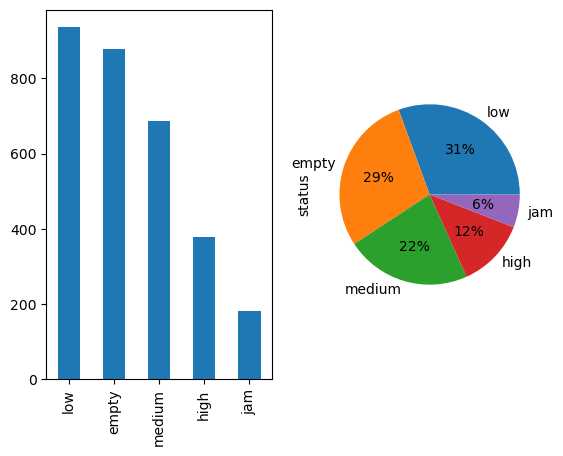

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=2)
dist_status.plot(kind='bar',ax=ax[0])
dist_status.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
plt.show()

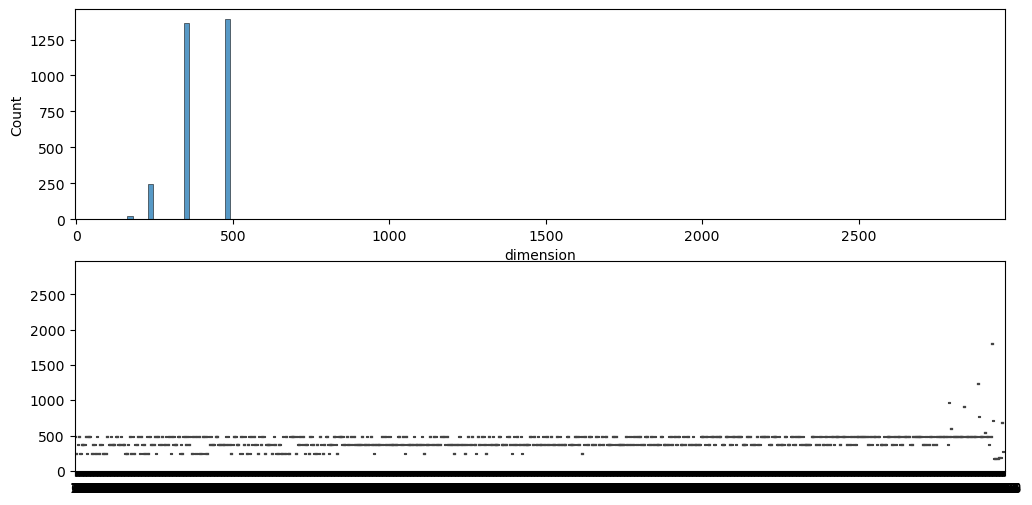

In [13]:
# What Distribution of size of all Images
# Histogram
# Box Plot
# Split by “Status”
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

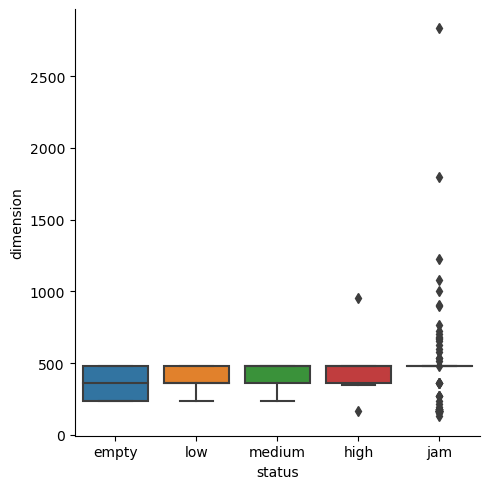

In [14]:
sns.catplot(data=df,x='status',y='dimension',kind='box')

1. We have almost equal distrbution of gender (numbers)
2. Most of the images are having dimension more than 60
3. Female most of the female images are HD compare to male images

---
- **Consider the image with dimensions more than 250**
- **Resize all the the image into 300 x 300**

In [17]:
df_filter = df.query('dimension > 250')
df_filter.shape

(2784, 3)

In [18]:
df_filter['status'].value_counts(normalize=True)

low       0.327945
medium    0.246408
empty     0.235632
high      0.135417
jam       0.054598
Name: status, dtype: float64

#### Structure the image 
- 300 x 300

In [19]:
def structuring(path):
    try:

        # step - 1: read image
        img = cv2.imread(path) # BGR
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 300 x 300 array   

        size = gray.shape[0]
        if size >= 100:
            # cv2.INTER_AREA (SHINK)
            gray_resize = cv2.resize(gray,(300,300),cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray,(300,300),cv2.INTER_CUBIC)

        # step -4: Flatten Image 
        flatten_image = gray_resize.flatten()
        return flatten_image
    
    except:
        return None

In [20]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images into 300 x 300
df_filter.head()

,filepath,status,dimension,data
0,D:/Final_Project/traffic/Final Dataset/trainin...,empty,360,"[255, 255, 255, 255, 255, 255, 255, 253, 253, ..."
2,D:/Final_Project/traffic/Final Dataset/trainin...,empty,480,"[253, 253, 254, 254, 254, 254, 254, 254, 252, ..."
3,D:/Final_Project/traffic/Final Dataset/trainin...,empty,480,"[114, 120, 120, 113, 110, 115, 110, 101, 100, ..."
6,D:/Final_Project/traffic/Final Dataset/trainin...,empty,480,"[253, 253, 254, 254, 254, 254, 254, 254, 252, ..."
8,D:/Final_Project/traffic/Final Dataset/trainin...,empty,480,"[253, 253, 253, 253, 254, 254, 254, 253, 251, ..."


In [21]:
data = df_filter['data'].apply(pd.Series)
data.columns = [f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_89990,pixel_89991,pixel_89992,pixel_89993,pixel_89994,pixel_89995,pixel_89996,pixel_89997,pixel_89998,pixel_89999
0,255,255,255,255,255,255,255,253,253,253,...,98,110,106,116,112,105,105,105,94,81
2,253,253,254,254,254,254,254,254,252,252,...,22,23,25,24,22,23,24,24,24,24
3,114,120,120,113,110,115,110,101,100,95,...,69,68,68,69,69,71,70,72,68,68
6,253,253,254,254,254,254,254,254,252,252,...,80,82,79,80,85,82,81,83,85,87
8,253,253,253,253,254,254,254,253,251,252,...,28,28,28,27,25,27,27,27,28,28


# Data Normalization

In [22]:
# since for 8 bit image max value is 255 
# therefore we are dividing each and every pixel with 255
data = data/255.0 
data['status'] = df_filter['status']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_89991,pixel_89992,pixel_89993,pixel_89994,pixel_89995,pixel_89996,pixel_89997,pixel_89998,pixel_89999,status
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,...,0.431373,0.415686,0.454902,0.439216,0.411765,0.411765,0.411765,0.368627,0.317647,empty
2,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.988235,0.988235,...,0.090196,0.098039,0.094118,0.086275,0.090196,0.094118,0.094118,0.094118,0.094118,empty
3,0.447059,0.470588,0.470588,0.443137,0.431373,0.450980,0.431373,0.396078,0.392157,0.372549,...,0.266667,0.266667,0.270588,0.270588,0.278431,0.274510,0.282353,0.266667,0.266667,empty
6,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.988235,0.988235,...,0.321569,0.309804,0.313725,0.333333,0.321569,0.317647,0.325490,0.333333,0.341176,empty
8,0.992157,0.992157,0.992157,0.992157,0.996078,0.996078,0.996078,0.992157,0.984314,0.988235,...,0.109804,0.109804,0.105882,0.098039,0.105882,0.105882,0.105882,0.109804,0.109804,empty


In [23]:
data.shape

(2784, 90001)

# Save the Data

In [29]:
import pickle

In [30]:
pickle.dump(data,open('./data/data_images_300_300.pickle',mode='wb'))

MemoryError: 

---
### END